In [8]:
!nvidia-smi

Tue Jul  9 23:49:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060 ...    Off | 00000000:26:00.0  On |                  N/A |
| 37%   44C    P5              17W / 175W |    589MiB /  8192MiB |     11%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
!pip install tensorflow-io
!pip install 'tensorflow[and-cuda]'

  Using cached nvidia_cublas_cu12-12.3.4.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.3.101-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.3.107-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.3.101-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cudnn_cu12-8.9.7.29-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cufft_cu12-11.0.12.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.4.107-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.5.4.101-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.2.0.103-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl.metadata (1.8 kB)
Using cached nvidia_cublas_cu12-12.3.4.1-py3-none-manylinux1_

In [9]:
# Importing required libraries

import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

import numpy as np

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [10]:
#Dataset directory path

dataset_dir = './Dataset/'
positive_calls = dataset_dir + 'Parsed_Capuchinbird_Clips/'
negative_calls = dataset_dir + 'Parsed_Not_Capuchinbird_Clips/'

positive_test = positive_calls + 'XC3776-0.wav'
negative_test = negative_calls + 'afternoon-birds-song-in-forest-0.wav'

In [11]:
# Creating a dataset pipeline
pos_data = tf.data.Dataset.list_files(positive_calls + '*.wav')
neg_data = tf.data.Dataset.list_files(negative_calls + '*.wav')

# Adding labels to the data
positives = tf.data.Dataset.zip(pos_data, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos_data))))
negatives = tf.data.Dataset.zip(neg_data, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_data))))

# Creating a joint dataset
dataset = positives.concatenate(negatives)

In [12]:
print("Positive Example: ", positives.as_numpy_iterator().next())
print("Negative Example: ", negatives.as_numpy_iterator().next())

Positive Example:  (b'./Dataset/Parsed_Capuchinbird_Clips/XC495697-4.wav', 1.0)
Negative Example:  (b'./Dataset/Parsed_Not_Capuchinbird_Clips/rooster-call-sound-0.wav', 0.0)


In [13]:
# Function to load and resample audio files
def load_n_resample(file_path):
    # Read audio file
    audio_clip = tfio.audio.AudioIOTensor(file_path, dtype = tf.float32)
    rate_in = 44100
    rate_out = 16000

    audio_clip = audio_clip.to_tensor()
    audio_clip  = tf.cast(audio_clip, tf.float32) / 32768.0
    
    #Sequeez to a single dimension
    if audio_clip.shape[1] == 2:
        audio_clip = tf.reduce_mean(audio_clip, axis = 1)

    audio_clip = tf.squeeze(audio_clip)

    #Resample the data to 16k
    resampled_audio = tfio.audio.resample(audio_clip, rate_in, rate_out)

    return resampled_audio
    

In [14]:
pos_audio = load_n_resample(positive_test)
neg_audio = load_n_resample(negative_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2024-07-10 00:06:00.297457: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


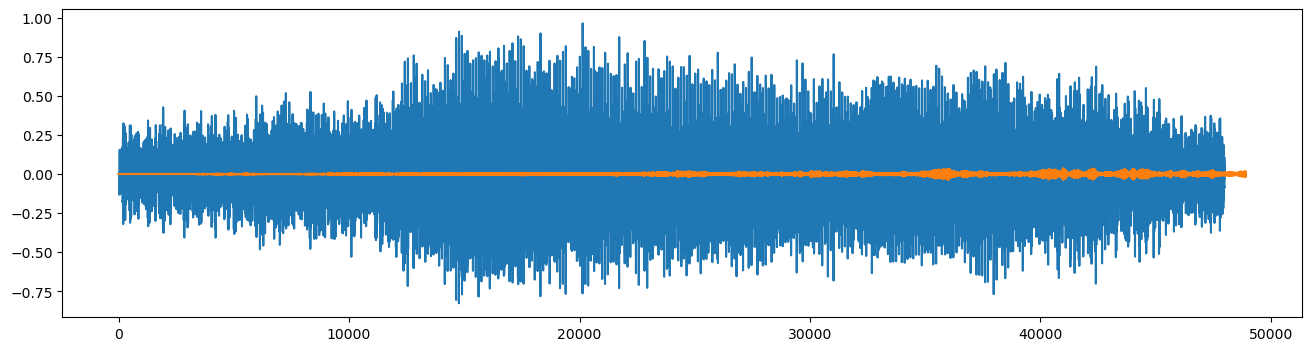

In [7]:
plt.figure(figsize = (16,4))
plt.plot(pos_audio)
plt.plot(neg_audio)
plt.show()

In [10]:
# Average lenghth of each audio file in the dataset

length = []
for data in dataset.as_numpy_iterator():
    audio = load_n_resample(data[0])
    length.append(len(audio))  

mean = tf.math.reduce_mean(length) 
min = tf.math.reduce_min(length)
max = tf.math.reduce_max(length)

print('Mean: ', mean)
print('Max: ', max)
print('Min: ', min)

Mean:  tf.Tensor(50660, shape=(), dtype=int32)
Max:  tf.Tensor(80000, shape=(), dtype=int32)
Min:  tf.Tensor(8000, shape=(), dtype=int32)


2024-07-09 01:08:24.821159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
# Average audio clip length
print("Average clip length:",50598/16000)

Average clip length: 3.162375


In [9]:
# Trimming all the clip to 3s each and also generating the spectrogram

def preprocess(data, label):
    audio_file = load_n_resample(data)                                               # Loads the audio file
    audio_file = audio_file[:48000]                                                  # Select only first 3 secs of clip
    padding = tf.zeros([48000] - tf.shape(audio_file), dtype = tf.float32)           # Zero padding for clips shorter than 3 secs
    audio_file = tf.concat([padding, audio_file], 0)

    spectrogram = tf.signal.stft(audio_file, frame_length = 512 , frame_step = 128)  # Generates spectrogram using short time fourier transform
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis = 2)                              # Expand to channel dimension for use with CNN
    
    return spectrogram, label

In [10]:
data, label = dataset.shuffle(buffer_size=1000).as_numpy_iterator().next()
spec, label = preprocess(data, label)

print("Spectrogram: ", spec)
print("Label: ",label)

Spectrogram:  tf.Tensor(
[[[2.2548473e+00]
  [2.2912507e+00]
  [3.4164166e+00]
  ...
  [4.1759042e-05]
  [3.4342622e-05]
  [1.3589859e-05]]

 [[3.3255047e-01]
  [1.9046322e+00]
  [1.9213084e+00]
  ...
  [5.1844741e-05]
  [1.3648325e-05]
  [4.9918890e-06]]

 [[1.9742407e-01]
  [1.2922940e+00]
  [1.8349533e+00]
  ...
  [8.4026397e-05]
  [3.0560288e-05]
  [3.0174851e-05]]

 ...

 [[6.5151501e+00]
  [5.5409384e+00]
  [1.6987964e+00]
  ...
  [1.9749048e-05]
  [1.2572210e-05]
  [3.8146973e-06]]

 [[5.8479846e-01]
  [7.5334587e+00]
  [7.4448266e+00]
  ...
  [3.0282914e-05]
  [1.0586328e-05]
  [2.1159649e-06]]

 [[6.4346809e+00]
  [7.8546858e+00]
  [7.5644317e+00]
  ...
  [4.7571528e-05]
  [2.0266982e-05]
  [1.4305115e-05]]], shape=(372, 257, 1), dtype=float32)
Label:  0.0


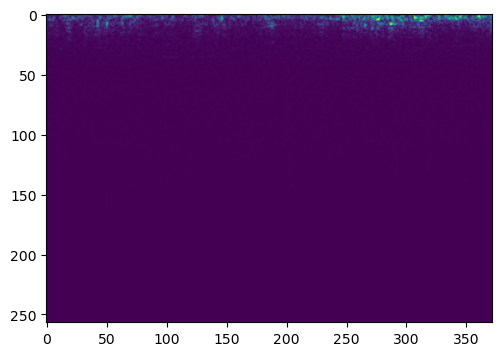

In [11]:
# Visualize the spectrogram
plt.figure(figsize=(16,4))
plt.imshow(tf.transpose(spec)[0])
plt.show()

In [12]:
# Applying preprocessing to the data and optimizing the pipeline

dataset = dataset.map(preprocess)
dataset = dataset.cache()
dataset = dataset.shuffle(buffer_size=1000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [13]:
# Split data into test and train

total = len(dataset)
data_train = dataset.take(int(total*0.8))
data_test = dataset.skip(int(total*0.8)).take(total - int(total*0.8))

In [14]:
print("Total Samples:", total)
print("Training data size:", len(data_train))
print("Testing data size:", len(data_test))

Total Samples: 51
Training data size: 40
Testing data size: 11


In [ ]:
samples, label = dataset.as_numpy_iterator().next()

In [4]:
tf.config.list_physical_devices('GPU') 

[]